### meteo.data COMEPHORE - Lecture & visualisation des images radar de pluie en 1h
- Auteur: https://github.com/loicduffar
- data: https://meteo.data.gouv.fr/

Les données doivent être téléchargées à la main (1 fichier par mois). Les images horaires couvrent la France métropolitaine et le géoréférencement original est en coordonnées Lambert2 étendues.
- Tracé des cartes de l'évènement (carte statique heure par heure PNG + carte animée HTML) - OPTIONNEL
- Extraction de la série chronologique pour un point (obligatoire) et un polygone et stockage dans un fichier Excel
- Tracé d'une carte de cumul sur une période choisie PGN, geoTIFF & HTML - OPTIONNEL
- Sauvegarde dans un fichier excel

Il faut nécessairement personaliser:
- Le dossier des fichier geotiff Météo-France (NB: le nom du sous-dossier doit être explicite car il sera utilisé pour nommer les fichiers de sortie)
- Un dossier de sortie quelconque pour les fichiers de sortie
- un rectangle d'intérêt à extraire de l'image originale de la France hexagonale entière 
- une date de début et de fin de l'èvènement (nécessairement incluses dans les fichiers d'entrée )
- un point (obligatoire) et un polygone (optionnel) desquels extraire la série chronologique de la pluie (en projection WGS84 lat long)
- Un fichier vecteur (optionnel) permettant d'habiller la carte, avec des cours d'eau par exemple
- Toute la subtilité de la personalisation consiste à définir tous ces parmètres de façon cohérente

NB: toutes les coordonnées de personalisation doivent être exprimées en lat lon WGS84 (rectangle d'intérêt, point, polygone, couche d'habillage)

#### 1- Personalisation & Lecture

In [ ]:
######################
# Auteur. L. Duffar
# Juillet 2025
######################
import xarray as xr
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cartopy
import pandas as pd
import os
import datetime
import geopandas as gpd
import requests
import json

#################### Personalisation
## ATTENTION Il faut défénir en cohérence le dossier d'entrée, les dates, le rectangle d'intérêt et me polygone de calcul de la lame moyenne

# Dossier des fichiers d'entrée (NB: le nom du sous-dossier doit être explicite car il sera utilisé pour nommer les fichiers de sortie)
# folder_in= r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Climat France\Météo-France\meteo.data\BASE\COMEPHORE\2015-10-03_04 06"
# folder_in= r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Climat France\Météo-France\meteo.data\BASE\COMEPHORE\2020-10-02_03 Alex"
# folder_in= r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Climat France\Météo-France\meteo.data\BASE\COMEPHORE\2025-03-09_10_11"
# folder_in= r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Climat France\Météo-France\meteo.data\BASE\COMEPHORE\2020-09-18_19_20 Cévennes"
# folder_in= r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Climat France\Météo-France\meteo.data\BASE\COMEPHORE\2011-11-01_09 Var"
# folder_in= r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Climat France\Météo-France\meteo.data\BASE\COMEPHORE\2025-05-20 Var"
# folder_in= r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Climat France\Météo-France\meteo.data\BASE\COMEPHORE\2014-01-18_19 La Laye"
# folder_in= r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Climat France\Météo-France\meteo.data\BASE\COMEPHORE\2003-12-01_02 La Laye"
# folder_in= r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Climat France\Météo-France\meteo.data\BASE\COMEPHORE\2016-11-21_22 La Laye"
# folder_in= r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Climat France\Météo-France\meteo.data\BASE\COMEPHORE\2019-11-30_2019-12-01 La Laye"
folder_in= r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Climat France\Météo-France\meteo.data\BASE\COMEPHORE\2019-12-20 La Laye"

# Dossier de sortie
folder_out = r"X:\3-PROJ_CONCESSION\2023_11_20-ETU-RESSOURCES BESOINS EAU\1-ETUDE\2- Production\Météo France\COMEPHORE"

# date debut et date de fin de l'événement (doit être cohérent avec les fichiers d'entrée)

# date_debut= "2011-11-04 00" # Fortes pluies en PACA
# date_fin= "2011-11-09 23"

# date_debut= "2015-10-03 00" # Inondation catastrophique de mandelieu La Napoule
# date_fin= "2015-10-04 06"

# date_debut= "2020-10-02 00" # Tempête Alex
# date_fin= "2020-10-03 06"

# date_debut= "2020-09-19 00" # Cévennes Pluie 1000 mm en 3h
# date_fin= "2020-09-20 00"

# date_debut= "2025-05-20 00" # Forte pluie locale Vidauban-La Mole-Lavandou
# date_fin= "2025-05-20 23"

# date_debut= "2014-01-18 00" # Forte crue de la Laye
# date_fin= "2014-01-19 23"

# date_debut= "202-01 00" # Forte crue de la Laye
# date_fin= "2003-12-02 23"03-1

# date_debut= "2016-11-21 00" # Forte crue de la Laye
# date_fin= "2016-11-22 23"

# date_debut= "2019-11-30 00" # Forte crue de la Laye
# date_fin= "2019-12-01 23"

date_debut= "2019-12-19 00" # Forte crue de la Laye
date_fin= "2019-12-20 23"

# rectangle d'intérêt (obligatoire)
lon_min, lat_min, lon_max, lat_max =[4.2, 42.9, 7.75, 44.7]# PACA
# lon_min, lat_min, lon_max, lat_max =[2.92, 43.08, 4.8, 45.0]# Languedoc
# lon_min, lat_min, lon_max, lat_max= [-5.65, 41.0, 10.0, 52.0] # FRANCE métropolitaine avec Corse

# Point d'extraction (obligatoire)
# dict_point= {'station': 'Cannes', 'lat': 43.5565, 'lon': 6.9505}
# dict_point= {'station': 'Mandelieu La Napoule SAPC', 'lat': 43.52357, 'lon': 6.898667}
# dict_point= {'station': 'St Martin de Vésubie SAPC', 'lat': 44.0656, 'lon': 7.255} 
# dict_point= {'station': 'Tende SAPC', 'lat': 44.043, 'lon': 7.586} 
# dict_point= {'station': 'Breil sur Roya', 'lat': 43.94, 'lon': 7.514} 
# dict_point= {'station': 'Le Vigan', 'lat': 43.99, 'lon': 3.612} 
# dict_point= {'station': 'St André de Valborgne', 'lat': 44.1376, 'lon': 3.7505}
# dict_point= {'station': 'Collobrières', 'lat': 43.23167, 'lon': 6.25667}
# dict_point= {'station': 'Pégomas', 'lat': 43.60167, 'lon': 6.93667}
# dict_point= {'station': 'Vidauban', 'lat': 43.386667, 'lon': 6.525}
# dict_point= {'station': 'Barrage de la Verne', 'lat': 43.2279, 'lon': 6.4442}
dict_point= {'station': 'Lardier', 'lat': 44.05233, 'lon': 5.7135}
# dict_point= {'station': 'Barrage La Laye', 'lat': 43.9444, 'lon': 5.7523}

# Polygone d'extraction (optionnel) 
polygon_file = None # Obligatoire si on ne définit pas de polygone
# polygon_file = r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Banque Hydro\Stations_Hydro_Metropole\Sites_projets\Var\BV_Vésubie@St Martin de Vésubie WGS84.gpkg"
# polygon_file = r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Banque Hydro\Stations_Hydro_Metropole\Sites_projets\Bevera\BV_Roya@St Dalmas deTende WGS84.gpkg"
# polygon_file = r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Banque Hydro\Stations_Hydro_Metropole\Sites_projets\Bevera\BV_Roya@Frontière (aval Breil sur Roya) WGS84.gpkg"
# polygon_file = r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Banque Hydro\Stations_Hydro_Metropole\Sites_projets\Languedoc\BV_Hérault à route du Vigan WGS84.gpkg"
# polygon_file = r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Banque Hydro\Stations_Hydro_Metropole\Sites_projets\Languedoc\BV_Gardon de St-Jean WGS84.gpkg"
# polygon_file = r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Banque Hydro\Stations_Hydro_Metropole\Sites_projets\Siagne\BV_Siagne aval Montauroux.gpkg"
# polygon_file = r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Banque Hydro\Stations_Hydro_Metropole\Sites_projets\Mole_Giscle\BV_Barrage La Verne.gpkg"0
polygon_file = r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Banque Hydro\Stations_Hydro_Metropole\Sites_projets\Largue - Laye\BV_Laye au barrage WGS84.gpkg"

# Habillage
wrapping_file = r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Banque Hydro\Stations_Hydro_Metropole\Sites_projets\RH_cours d'eau principaux PACA.shp"
# wrapping_file = r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Banque Hydro\Stations_Hydro_Metropole\Sites_projets\RH_cours d'eau principaux OCCITANIE.gpkg"

#################### Initialisation
print(datetime.datetime.now().strftime('%d/%m/%Y %H:%M'))
event= folder_in.split("\\")[-1] # Nom de l'événement à partir du nom du sous-dossier d'entrée
# split date_debut and date_fin en chaine sans espace
file_debut = date_debut.replace("-", "").replace(" ", "") + '_RR.gtif'
file_fin = date_fin.replace("-", "").replace(" ", "") + '_RR.gtif'
seuil_filtre= 1e+10
res = '10m'                  # resolution for naturalearth basemap with cartopy: 10m, 50m or 110m (10m = 1/ 10 000 000)
gdf_wrapping = gpd.read_file(wrapping_file) if os.path.exists(wrapping_file) else None

if polygon_file is not None: 
    gdf_polygon = gpd.read_file(polygon_file)
    gdf_polygon = gdf_polygon.to_crs(epsg=4326)  # Convertir en WGS84 si nécessaire
    # gdf_polygon = gdf_polygon.to_crs(ds_concat.rio.crs)  # Convertir en la même projection que ds_concat
    # gdf_polygon.boundary.plot(ax=ax, edgecolor='magenta', facecolor='none', alpha=1.0, linewidth=1)

if not os.path.exists(folder_out):
    os.makedirs(folder_out)
# Colormap personalisée pour les précipitations
# cmap= 'cool'
cmap= 'jet'
cmap = plt.get_cmap(cmap)# Obtenez la colormap
colors = cmap(np.arange(cmap.N)) # Convertir la colormap en liste de couleurs
colors[0] = (1, 1, 1, 0)  # # Modifiez la première couleur (RGBA pour blanc)
colors[1] = (1, 1, 1, 0)  # # Modifiez la première couleur (RGBA pour blanc)
colors[2] = (1, 1, 1, 0)  # # Modifiez la première couleur (RGBA pour blanc)

# Créez une nouvelle colormap à partir d'une colormap existante transformée en liste de couleurs
cmap_precip = matplotlib.colors.LinearSegmentedColormap.from_list('cmap_precip', colors, cmap.N)
# Même colormap impérativement en hexadécimalet itarable pour hvplot
cmap_iterable = [matplotlib.colors.to_hex(cmap_precip(i / 255), keep_alpha= True) for i in range(256)]  
# Point en dataframe pour les cartes
df_point = pd.DataFrame({
    'lon': [dict_point['lon']],
    'lat': [dict_point['lat']],
    'station': [dict_point['station']]
})
# Résolution des graphiques et cartes
dpi= 200
# Projection pour la carte
proj= cartopy.crs.PlateCarree()
# Initialisation du dataarray de cumul des précipitations sur une période choisie
da_cumul = None

################### Lecture des fichiers geotiff
#++++++++++++++++++ Chargement des données dans une boucle entre file_debut et file_fin
ds_concat= None
for file in os.listdir(folder_in):
    if file>= file_debut and file <= file_fin and file.endswith('_RR.gtif'):
        file_path = os.path.join(folder_in, file)
        ds = xr.open_dataset(file_path, engine='rasterio')
        # renmmer la variable 'band' en 'RR'
        ds = ds.rename({'band_data': 'RR'})
        # remplace touite les valeurs 65535  par np.nan
        ds['RR'] = ds['RR'].where(ds['RR'] != 65535, np.nan)
        # converti la pluie en mm
        ds= ds / 10

        # convertir  en coordonnées WGS84 les coodonnées de indiqué dans les fichier geotiff (a priori déjà en WGS84)
        ds = ds.rio.reproject("EPSG:4326")
        # remplace par NaN les valeurs supérieures trés élevées générées par la méthode rioxarray.rio.reproject qui ne gère pas correctement les NaN
        ds = ds.where(ds < seuil_filtre, other= float('nan'))
        # renommer les coordonnées 'x' et 'y' en 'longitude' et 'latitude'
        ds = ds.rename({'x': 'lon', 'y': 'lat'})
        # supprimer la coordonnée 'band' si elle existe
        ds = ds.drop_vars('band')
        # supprimer la dimension 'band' si elle existe
        ds = ds.squeeze('band', drop=True)

        # ajoute une coordonnée 'time' avec la date du fichier
        date_str= file.split('_')[0]
        # convertir date_str en datetime
        date = f"{date_str[:4]}-{date_str[4:6]}-{date_str[6:8]} {date_str[8:10]}:00"
        ds = ds.assign_coords(time= pd.to_datetime(date))
        # ajouter la dimension time
        ds = ds.expand_dims(dim='time', axis=0)
        ds= ds.transpose('time', 'lat', 'lon')

        # clip les données au rectangle d'intérêt
        ds = ds.where((ds.lon >= lon_min) & (ds.lon <= lon_max) &
                      (ds.lat >= lat_min) & (ds.lat <= lat_max), drop=True)   
        # display(ds)
       # test si ds_concat est None pour la première itération
        if ds_concat is None:
            ds_concat = ds
        else:
            ds_concat = xr.concat([ds_concat, ds], dim= 'time')

rr_max= ds_concat['RR'].max().values
print("Données en mémoire dans un dataset xarray")
display(ds_concat)


12/07/2025 18:50
Données en mémoire dans un dataset xarray


<xarray.Dataset> Size: 9MB
Dimensions:      (time: 48, lat: 158, lon: 312)
Coordinates:
  * lon          (lon) float64 2kB 4.205 4.216 4.227 4.239 ... 7.72 7.731 7.743
  * lat          (lat) float64 1kB 44.69 44.68 44.67 44.66 ... 42.93 42.92 42.9
    spatial_ref  int32 4B 0
  * time         (time) datetime64[ns] 384B 2019-12-19 ... 2019-12-20T23:00:00
Data variables:
    RR           (time, lat, lon) float32 9MB 3.4 2.1 1.8 1.3 ... nan nan nan

#### 2- Carte matplotlib heure par heure OPTIONNEL

In [2]:
############ Initialisation pour l'affichage des cartes
print(datetime.datetime.now().strftime('%d/%m/%Y %H:%M'))

#++++++++++++++++++++ affiche les cartes pour chaque time
for time in ds_concat['time'].values:
        #--------------------- Préparation de la figure
        plt.figure(figsize=(10, 6), dpi= dpi)
        ax = plt.axes(projection= proj)  # Projection géographique standard
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs= proj) # limiter la figure au rectangle géographique d'intérêt
        #--------------------- PLOT
        fig= ds_concat['RR'].sel(time= time).plot(
                        ax= ax,
                        cmap= cmap_precip,
                        transform= proj,
                        cbar_kwargs= {'label': 'mm'}
                        )

        plt.scatter(dict_point['lon'], dict_point['lat'], s= 15, color='magenta', edgecolors='black', 
                    marker='o', label= dict_point['station'], transform= proj) # Point d'extraction

        if polygon_file is not None: 
                gdf_polygon.boundary.plot(ax=ax, edgecolor='magenta', facecolor='none', alpha=1.0, linewidth=1)
                        
        #--------------------- Configuration de la figure
        # définir la limite max de la colorbar
        fig.set_clim(0, rr_max)  # Limite de la colorbar de 0 à la valeur maximale des précipitations
        # Définir le titre date_time_str avec la date, sans les secondes et millisecondes
        date_time_str = pd.to_datetime(time).strftime('%Y-%m-%d %H:%M')
        ax.set_title(f'Précipitations radar COMEPHORE 1h - {date_time_str} UTC')
        # Affichage de la valeur maximale des précipitations sur la figure
        val_max= f"Max: {ds_concat['RR'].sel(time= time).max().values.item():.1f} {'mm'}" # valeur maximale
        ax.annotate(val_max, xy=(0.02, -0.03), xycoords='axes fraction', fontsize=10, ha='left', color= 'black')

        #--------------------- Habillage de la carte
        color_rivers= 'lightskyblue'
        #........... Habillage personnalisé
        if gdf_wrapping is not None: gdf_wrapping.plot(ax=ax, edgecolor= color_rivers, facecolor='none', linewidth=0.5,) 
        
        #........... Côtes, frontières, rivières, etc.
        ax.coastlines(resolution=res, linewidth=0.5)
        ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
        ax.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', res, facecolor='none', edgecolor=color_rivers))#, alpha=0.5)
        # ax.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'rivers_europe', res, facecolor='none', edgecolor=color_rivers))

        #........... Départements et régions françaises à partir de fichier GeoJSON en ligne
        url_departements= 'https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson'
        url_departements= "https://france-geojson.gregoiredavid.fr/repo/departements.geojson"
        url_regions= "https://france-geojson.gregoiredavid.fr/repo/regions.geojson"
        # charge le fichier en ligne 
        geojson_departements= requests.get(url_departements).json()
        geojson_regions= requests.get(url_regions).json()
        # convertit le geojson_departements en GeoDataFrame
        gdf_departements = gpd.GeoDataFrame.from_features(geojson_departements['features'])
        gdf_regions = gpd.GeoDataFrame.from_features(geojson_regions['features'])
        # ajoute à la carte
        # ax.add_geometries(gdf_departements.geometry, crs= proj, edgecolor='lightgrey', facecolor='none', linewidth=0.5)
        ax.add_geometries(gdf_regions.geometry, crs= proj, edgecolor='grey', facecolor='none', linewidth=0.5)
        ax.annotate("https://github.com/loicduffar/meteo.data-Tools", 
                        xy= (1, 0), 
                        xycoords='axes fraction',
                        fontsize= 5,
                        ha='left',
                        va= 'bottom',
                        color='black',
                        rotation= 90)
        #--------------------- Sauvegarde de la figure
        output_file = os.path.join(folder_out, f'{date_time_str[:-3]}.png')# Enlever les ':00' pour éviter les problèmes de nom de fichier
        plt.savefig(output_file, bbox_inches='tight', dpi= dpi)  
        # plt.show()

        plt.close()  # Fermer la figure pour libérer la mémoire
print("Cartes png sauvegardées dans ", folder_out)

12/07/2025 18:50
Cartes png sauvegardées dans  X:\3-PROJ_CONCESSION\2023_11_20-ETU-RESSOURCES BESOINS EAU\1-ETUDE\2- Production\Météo France\COMEPHORE


#### 3- Animation  OPTIONNEL
Problème: le titre avec l'heure ne suit pas correctement le défilement des images

In [3]:
import hvplot.xarray
import hvplot.pandas 
from holoviews import opts
print(datetime.datetime.now().strftime('%d/%m/%Y %H:%M'))
# transforme la colormap matplotlib en une liste de couleurs hexadécimales pour hvplot

#--------------------- Affichage avec hvplot
hv_plot1= ds_concat['RR'].hvplot(
    x= 'lon', y= 'lat', 
    crs= proj,
    geo= True,
    groupby= 'time', 
    coastline= '10m',
    cmap= cmap_iterable,
    # cmap= 'cool',
    # cmap = 'turbo',
    clim= (0, rr_max), 
    colorbar= True,
    tiles= 'CartoLight',  # ← Fond cartographique
    alpha= 0.8,
    width= 900, height= 700,
    # title='Precipitation radar horaire COMEPHORE',
    widget_type= "scrubber",
    widget_location= "bottom",
    )#.opts(framewise=True)# <-- Important pour la superposition d'objet statiques avec l'animation

# # Ajouter le point d'extraction sur la carte NE MARCHE PAS AVEC UNE ANIMATION
# hv_plot2 = df_point.hvplot.points(
#                                 x='lon', y='lat',
#                                 color='red', size=100, hover_cols=['station'], marker='o',
#                                 dynamic=False  # <-- Important pour la superposition avec une animation
#                                 )
# hv_plot_anim= hv_plot1 * hv_plot2
# hv_plot_anim
hv_plot1

12/07/2025 18:51


c:\Users\DUFFAR\AppData\Local\anaconda3\envs\311_brut\Lib\site-packages\dask\dataframe\__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


BokehModel(combine_events=True, render_bundle={'docs_json': {'11201ac7-339a-43ac-aba0-3fdc478b05b7': {'version…

#### 4- Sauvegarde de l'animation en fichier html avec panel OPTIONNEL
Html correctement généré malgré le warning "WARNING:param.panel_extension: bokeh extension not recognized and will be skipped."

In [4]:
import panel as pn

print(datetime.datetime.now().strftime('%d/%m/%Y %H:%M'))
pn.extension('bokeh')
pn.panel(hv_plot1).save(os.path.join(folder_out, '_COMEPHORE_animation_' + event + '.html'), embed=True)
print("Animation html sauvegardée dans ", folder_out)

12/07/2025 18:51


Animation html sauvegardée dans  X:\3-PROJ_CONCESSION\2023_11_20-ETU-RESSOURCES BESOINS EAU\1-ETUDE\2- Production\Météo France\COMEPHORE


#### 5- Extraction du cumul en un point et de la Lame d'eau moyenne sur un polygone + Graphique

In [5]:
import plotly.graph_objects as go
################ Personalisation

############### Initialisation
legend_point= dict_point['station']
legend_coord= str(dict_point['lat']) + ' ,' +  str(dict_point['lon'])
if polygon_file is not None:
    legend_polyg= os.path.basename(polygon_file).replace('.gpkg', '')

############### Extrait la série du point choisi par lat lon
print(datetime.datetime.now().strftime('%d/%m/%Y %H:%M'))
ds_timeserie = ds_concat['RR'].sel(lat= dict_point['lat'], lon= dict_point['lon'], method='nearest')
# Convertit en DataFrame pandas avec time comme index
df_timeserie = ds_timeserie.to_dataframe().reset_index()
df_timeserie = df_timeserie.set_index('time', drop=True)
df_timeserie = df_timeserie.drop(columns=['spatial_ref'], errors='ignore')#.set_index('time', drop=True)
df_timeserie.rename(columns={'RR': 'RR_point'}, inplace=True)  # Renommer la colonne 'RR' en 'RR_point'
    
################ Faire le moyenne pour chaque time sur le polygone, dans un dataframe pandas
if polygon_file is not None and os.path.exists(polygon_file):

    ds_polyg = ds_concat.rio.clip(gdf_polygon.geometry.apply(lambda geom: geom.__geo_interface__), gdf_polygon.crs, drop=True)
    # remplace les valeur supérieures à seuil_filtre par NaN (le clip génère des valeurs très élevées en dehors du polygone)
    ds_polyg['RR'] = ds_polyg['RR'].where(ds_polyg['RR'] < seuil_filtre, np.nan)
    # affiche la carte du premier élément du dataset ds_polyg
    # ds_polyg['RR'].isel(time=0).plot(cmap='viridis', vmin=0, vmax=100, add_colorbar=True)
    # plt.show()
    if polygon_file is not None:
        # pour chaque time calcul la moyenne des pixels et stocke la dans un dataframe pandas de série chronologique avec time comme index
        df_polyg = ds_polyg.mean(dim=['lat', 'lon']).to_dataframe().reset_index()
        # supprime la colonne spatial_ref
        df_polyg = df_polyg.drop(columns=['spatial_ref'], errors='ignore').set_index('time', drop=True)
        df_polyg['polygone'] = gdf_polygon['geometry'][0]  # Ajoute la géométrie du polygone
    
        # df_timeserie = df_timeserie.join(df_polyg, lsuffix='_point', rsuffix='_polyg', how='outer')
        df_timeserie = df_timeserie.join(df_polyg)
        df_timeserie.rename(columns={'RR': 'RR_polyg'}, inplace=True)
        df_timeserie['RR_polyg'] = df_timeserie['RR_polyg'].round(1) # arrondir les valeurs à 1 décimale
        # display(df_polyg)

display(df_timeserie.head(10))

################ Graphique de la pluie cumulée
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_timeserie.index, y=df_timeserie['RR_point'].cumsum(),
                         mode='lines+markers', name= dict_point['station'] + ': ' + legend_coord, line=dict(color='blue')))
if 'RR_polyg' in df_timeserie.columns:
  fig.add_trace(go.Scatter(x=df_timeserie.index, y=df_timeserie['RR_polyg'].cumsum(),
                            mode='lines+markers', name='Polygone: '+ legend_polyg, line=dict(color='red')))
fig.update_layout(title= 'meteo.data.gouv.fr COMEPHORE - Précipitations cumulées - ' + event,
                  xaxis_title= 'Heure UTC',
                    yaxis_title= 'Précipitations (mm)',
                    # legend_title='Légende',
                    width= 900, height= 600,
                    legend= dict(
                                x=0.05, y=0.95,           # coin supérieur gauche
                                xanchor='left',
                                yanchor='top'),  
                      hovermode= 'x unified', # Affiche le hover groupé pour toutes les traces
                      hoverlabel= dict(bgcolor= 'rgba(255,255,255,0.5)')
                    )
# défini le format d'affichage des nombre de hover
fig.update_traces(hovertemplate= '%{y:.1f} mm')  # Affiche les valeurs avec 1 décimale
fig.add_annotation(text= "https://github.com/loicduffar/meteo.data-Tools", xref= "paper", yref= "paper", x= 1., y= 0, xanchor= "left", yanchor= "auto",
                   textangle=-90, showarrow= False, font= dict(size= 8, color= "black"))
# fig.write_image(os.path.join(folder_out, f'_COMEPHORE_cumul_precipitations.png'), width=1800, height=1200, scale=2) # désactivé car provoque une excution sans fin
fig.show()


12/07/2025 18:52


c:\Users\DUFFAR\AppData\Local\anaconda3\envs\311_brut\Lib\site-packages\rioxarray\raster_writer.py:130: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(


,lon,lat,RR_point,RR_polyg,polygone
time,,,,,
2019-12-19 00:00:00,5.71773,44.053113,0.0,0.0,POLYGON Z ((5.747599491441737 43.9426043348337...
2019-12-19 01:00:00,5.71773,44.053113,0.0,0.0,POLYGON Z ((5.747599491441737 43.9426043348337...
2019-12-19 02:00:00,5.71773,44.053113,0.0,0.0,POLYGON Z ((5.747599491441737 43.9426043348337...
2019-12-19 03:00:00,5.71773,44.053113,0.0,0.0,POLYGON Z ((5.747599491441737 43.9426043348337...
2019-12-19 04:00:00,5.71773,44.053113,0.0,0.0,POLYGON Z ((5.747599491441737 43.9426043348337...
2019-12-19 05:00:00,5.71773,44.053113,0.0,0.0,POLYGON Z ((5.747599491441737 43.9426043348337...
2019-12-19 06:00:00,5.71773,44.053113,0.1,0.1,POLYGON Z ((5.747599491441737 43.9426043348337...
2019-12-19 07:00:00,5.71773,44.053113,0.0,0.0,POLYGON Z ((5.747599491441737 43.9426043348337...
2019-12-19 08:00:00,5.71773,44.053113,0.0,0.0,POLYGON Z ((5.747599491441737 43.9426043348337...


#### 6- Carte du cumul sur plusieurs heures choisies OPTIONNEL

12/07/2025 18:52


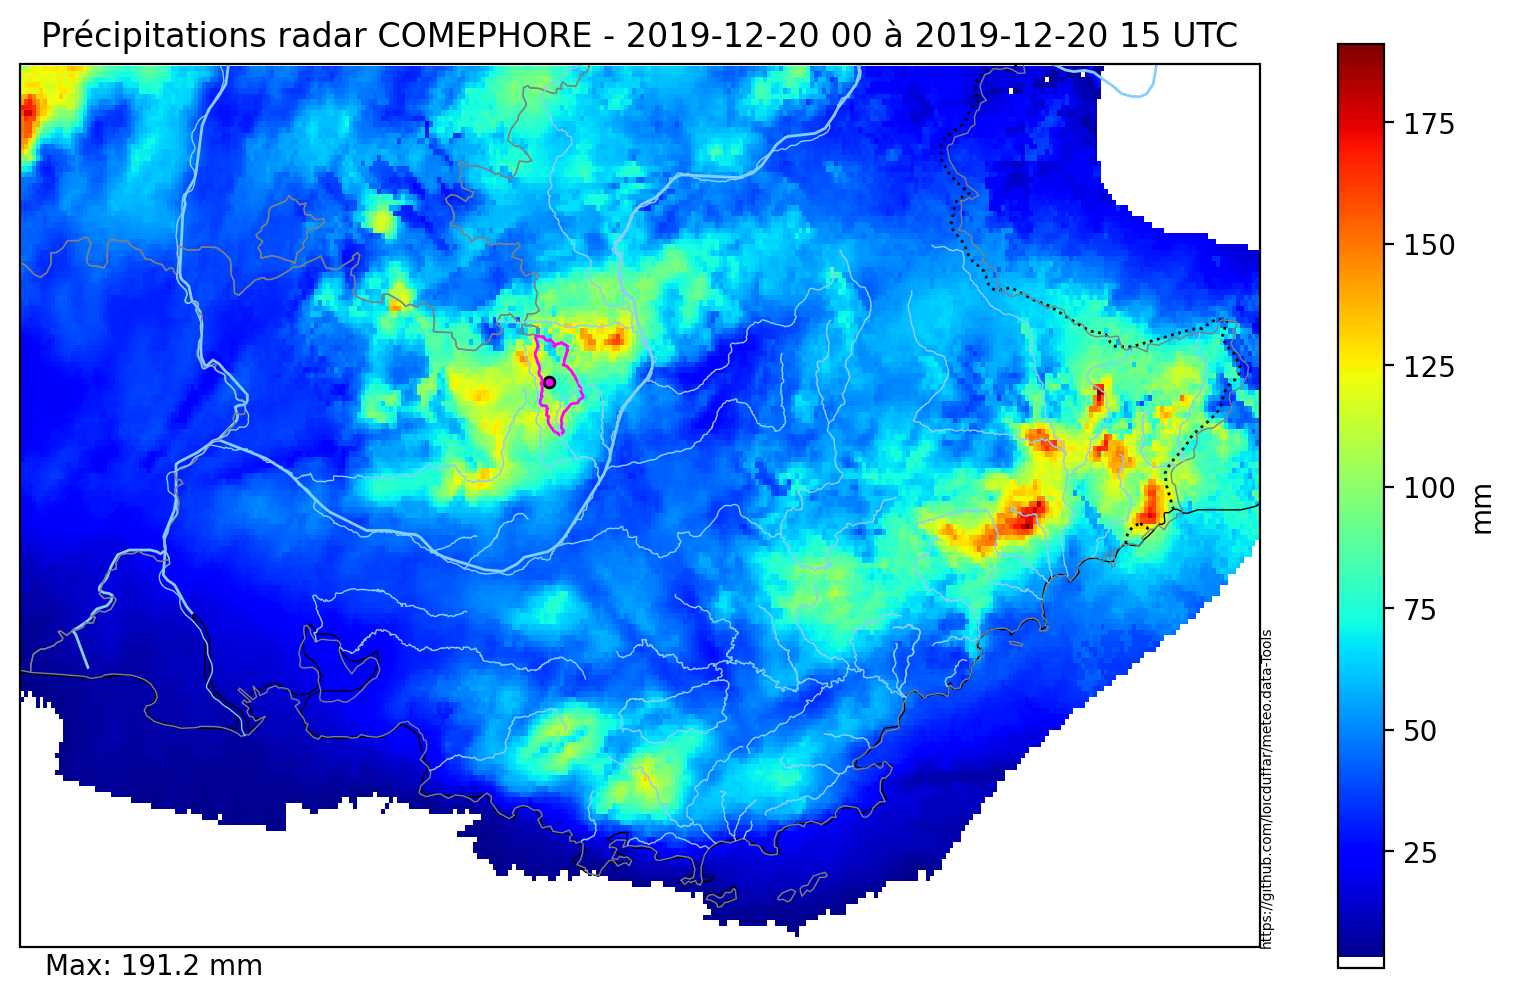

Carte PNG & geotiff du cumul des précipitations sauvegardé dans  X:\3-PROJ_CONCESSION\2023_11_20-ETU-RESSOURCES BESOINS EAU\1-ETUDE\2- Production\Météo France\COMEPHORE


In [6]:
################ Personalisation
date_debut_cumul= "2019-12-20 00"
date_fin_cumul= "2019-12-20 15"

################ Initialisation
title_cumul= f'Précipitations radar COMEPHORE - {date_debut_cumul} à {date_fin_cumul} UTC'

################ Cumul des précipitations entre date_debut_cumul et date_fin_cumul
print(datetime.datetime.now().strftime('%d/%m/%Y %H:%M'))
da_cumul = ds_concat['RR'].sel(time=slice(date_debut_cumul, date_fin_cumul)).sum(dim='time')
# remplace toute les 0 par NaN
da_cumul = da_cumul.where(da_cumul > 1, np.nan)  # remplace les valeurs faibles ou nulles par NaN

################ Carte cartopy de ce cumul
plt.figure(figsize=(10, 6), dpi= dpi)
ax = plt.axes(projection= proj)  # Projection géographique standard
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs= proj)  # limiter la figure au rectangle géographique d'intérêt
# PLOT
da_cumul.plot(
    ax=ax,
    cmap= cmap_precip,
    transform= proj,
    cbar_kwargs={'label': 'mm'}
)
if polygon_file is not None:
    gdf_polygon = gpd.read_file(polygon_file)
    gdf_polygon = gdf_polygon.to_crs(epsg=4326)  # Convertir en WGS84 si nécessaire
    gdf_polygon = gdf_polygon.to_crs(ds_concat.rio.crs)  # Convertir en la même projection que ds_concat
    gdf_polygon.boundary.plot(ax=ax, edgecolor='magenta', facecolor='none', alpha=1.0, linewidth=1)
plt.scatter(dict_point['lon'], dict_point['lat'], s=15, color='magenta', edgecolors='black',
        marker='o', label=dict_point['station'], transform=proj)  # Point d'extraction
# Configuration de la figure

ax.set_title(title_cumul, size= 12)
# Affichage de la valeur maximale des précipitations sur la figure
val_max = f"Max: {da_cumul.max().values.item():.1f} {'mm'}"  # valeur maximale
ax.annotate(val_max, xy=(0.02, -0.03), xycoords='axes fraction', fontsize=10, ha='left', color='black')
# Habillage de la carte
color_rivers = 'lightskyblue'
# Habillage personnalisé
if gdf_wrapping is not None:
    gdf_wrapping.plot(ax=ax, edgecolor=color_rivers, facecolor='none', linewidth=0.5)

# Côtes, frontières, rivières, etc.
ax.coastlines(resolution=res, linewidth=0.5)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', res, facecolor='none', edgecolor=color_rivers))#, alpha=0.5)
# ax.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'rivers_europe', res, facecolor='none', edgecolor=color_rivers))
# Départements et régions françaises à partir de fichier GeoJSON en ligne
url_departements = 'https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson'
url_departements = "https://france-geojson.gregoiredavid.fr/repo/departements.geojson"
url_regions = "https://france-geojson.gregoiredavid.fr/repo/regions.geojson"
# charge le fichier en ligne
geojson_departements = requests.get(url_departements).json()
geojson_regions = requests.get(url_regions).json()
# convertit le geojson_departements en GeoDataFrame
gdf_departements = gpd.GeoDataFrame.from_features(geojson_departements['features'])
gdf_regions = gpd.GeoDataFrame.from_features(geojson_regions['features'])
# ajoute à la carte
# ax.add_geometries(gdf_departements.geometry, crs= proj, edgecolor='lightgrey', facecolor='none', linewidth=0.5)
ax.add_geometries(gdf_regions.geometry, crs= proj, edgecolor='grey', facecolor='none', linewidth=0.5)
ax.annotate("https://github.com/loicduffar/meteo.data-Tools", 
                xy= (1, 0), 
                xycoords='axes fraction',
                fontsize= 5,
                ha='left',
                va= 'bottom',
                color='black',
                rotation= 90)

################ Sauvegarde de la figure
file_cumul= os.path.join(folder_out, f'_COMEPHORE_cumul_precipitations_{date_debut_cumul}_{date_fin_cumul}')  # Enlever les ':00' pour éviter les problèmes de nom de fichier
plt.savefig(file_cumul + '.png', bbox_inches='tight', dpi=dpi)
plt.show()
plt.close()  # Fermer la figure pour libérer la mémoire
# Affichage de la carte


################ SAuvergarde le fichier geotiff du cumul
da_cumul.rio.to_raster(file_cumul + '.gtif', driver='GTiff', dtype='float32')
print("Carte PNG & geotiff du cumul des précipitations sauvegardé dans ", folder_out)                   

#### 7 Carte interactive du cumul sur la période choisie - OPTIONNEL mais nécessite l'exécution préalable de la cellule optionnelle précédente
ATTENTION:  A ce jour les 2 cartes interactives de ce notebook (hvplot) sont fonctionnelles simultanément. Mais attention à toute modification du code qui pourrait provoquer certains dysfonctionnements en générant dans la même cession les 2 cartes intéractives OPTIONNELLES de ce notebook. Dans ce cas il suffit de fermer le notebook ou le kernel, et de relancer l'éxécution pour obtenir la carte qui ne marchait pas. 
 
Explication en termes informatiques. Plusieurs cartes hvplot qui fonctionnent seules peuvent provoquer des erreurs en cas d'exécution dans un même notebook pour des causes multiples :
- **Conflits d’état global (backend, extensions, widgets)**: hvplot, Holoviews et Panel utilisent des extensions (comme bokeh matplotlib) et des widgets (scrubber, slider, etc.) qui sont chargés globalement dans le kernel Jupyter. Si deux cellules ou notebooks chargent des extensions différentes, ou utilisent des widgets incompatibles, cela peut provoquer des conflits ou des comportements inattendus.
- **Problèmes de compatibilité entre objets**: Certains objets hvplot (par exemple, une animation avec groupby et un plot statique) ne peuvent pas toujours être superposés ou affichés ensemble sans adaptation. Parfois, la superposition retourne un objet Column (layout) au lieu d’un Overlay, ce qui limite les méthodes disponibles (.opts() par exemple). C'EST LE CAS DANS CE SCRIPT
- **Extensions Panel/Holoviews non réinitialisées**: En exécutant plusieurs notebooks dans le même kernel, ou plusieurs fois la même cellule, les extensions Panel/Holoviews peuvent être dans un état incohérent.
- **Pollution de l’espace de noms**: en utilisant les mêmes noms de variables pour des objets hvplot de types différents (Overlay, Column, DynamicMap…), le kernel garde le dernier type en mémoire. Cela peut provoquer des erreurs en réutilisant un nom pour un objet d’un autre type (ex : un Overlay puis un Column). CE QUI N'EST PAS LE CAS DANS CE SCRIPT MAIS PERMET D'EVITER DE FAIRE L'ERREUR

In [7]:
import hvplot.xarray
import hvplot.pandas 
from holoviews import opts

print(datetime.datetime.now().strftime('%d/%m/%Y %H:%M'))

# Couche du dataaarray du raster da_cumul sur la carte
hv_plot_cumul = da_cumul.hvplot(
    x='lon', y='lat',
    crs= cartopy.crs.GOOGLE_MERCATOR,  # Projection géographique
    # crs= cartopy.crs.PlateCarree(),
    geo= True,
    cmap= cmap_iterable,
    colorbar= True,
    alpha= 0.5,
    # widget_location="bottom",
)
# ajouter une légende à la colorbar
hv_plot_cumul = hv_plot_cumul.opts(
    # colorbar_opts={'label': 'mm'},
    # clim=(0, da_cumul.max().values.item()),  # Limite de la colorbar de 0 à la valeur maximale des précipitations
)
# Couche du Point d'extraction sur la carte
hv_plot_point = df_point.hvplot.points(
    projection= cartopy.crs.GOOGLE_MERCATOR,  # Projection géographique
    # projection= cartopy.crs.PlateCarree(),
    x= 'lon', y= 'lat',
    color= 'red', size= 100, hover_cols=['station'], marker='o',
    dynamic= False,  # <-- Important pour la superposition avec une animation
    tiles= 'CartoLight',  # Fond cartographique
)

# Couche du polygone du bassin versant si défini
if polygon_file is not None:
    hv_plot_polyg = gdf_polygon.hvplot(
        projection= cartopy.crs.GOOGLE_MERCATOR,  # Projection géographique compatible avec lat lon dans hvplot (contrairement à plotly qui utilise platecarree)
        # projection= cartopy.crs.PlateCarree(),
        x='geometry.x', y='geometry.y',
        geo= True,
        line_color= 'magenta',
        fill_color='none',
        line_width= 1,
    )

# Couche de l'habillage si défini
if gdf_wrapping is not None:
    hv_plot_wrapping = gdf_wrapping.hvplot(
        projection= cartopy.crs.GOOGLE_MERCATOR,  # Projection géographique
        # projection= cartopy.crs.PlateCarree(),
        x='geometry.x', y='geometry.y',
        geo= True,
        line_color= 'white',
        # fill_color= 'none',
        line_width= 1,
    )

# Superposer les couches
if polygon_file is not None: 
    hv_plot = hv_plot_cumul * hv_plot_polyg * hv_plot_point
else:
    hv_plot= hv_plot_cumul * hv_plot_point

if gdf_wrapping is not None:
    hv_plot = hv_plot * hv_plot_wrapping

# Options
hv_plot = hv_plot.opts(    
    title= title_cumul,
    toolbar= 'above',
    width= 900, height= 700,
)

hv_plot

12/07/2025 18:52


:Overlay
   .Image.I    :Image   [lon,lat]   (RR)
   .Polygons.I :Polygons   [geometry.x,geometry.y]
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Points.I   :Points   [lon,lat]   (station)
   .Path.I     :Path   [geometry.x,geometry.y]

In [8]:
import panel as pn

print(datetime.datetime.now().strftime('%d/%m/%Y %H:%M'))
pn.extension('bokeh')
pn.panel(hv_plot).save(os.path.join(folder_out, '_COMEPHORE_cumul_' + event + '.html'), embed=True)
print("Animation html sauvegardée dans ", folder_out)

12/07/2025 18:52


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : fill_color='none' [no close matches] {renderer: GlyphRenderer(id='4da79862-f26c-4913-b306-b71d70e0c976', ...)}


Animation html sauvegardée dans  X:\3-PROJ_CONCESSION\2023_11_20-ETU-RESSOURCES BESOINS EAU\1-ETUDE\2- Production\Météo France\COMEPHORE


#### 8- Sauvegarde des séries chronologiques (et du graphique éventuel) dans un fichier excel

In [9]:
import openpyxl

############ Initalisation 
print(datetime.datetime.now().strftime('%d/%m/%Y %H:%M'))
if polygon_file is not None:
    output_excel = os.path.join(folder_out, '_COMEPHORE_timeserie_' + event + '_' + legend_point + '_' + legend_polyg + '.xlsx')
else:
    output_excel = os.path.join(folder_out, '_COMEPHORE_timeserie_' + event + '_' + legend_point + '.xlsx')

df_temp= df_timeserie
if polygon_file is not None:
    polygone= f"Polygone: {df_timeserie['polygone'].iloc[0]}"
    df_temp= df_timeserie.drop(columns= ['polygone'], inplace= False, errors='ignore')  # Supprimer les colonnes répétitives
df_temp= df_temp.drop(columns=['lon', 'lat'], inplace= False, errors='ignore')  # Supprimer les colonnes répétitives

geojson_point = json.dumps({
                "type": "Point",
                "coordinates": [dict_point['lon'], dict_point['lat']]
                })

############### Enregistrement dans un fichier Excel
with pd.ExcelWriter(output_excel, engine='openpyxl') as writer:
    df_temp.to_excel(writer, index=True, sheet_name='data', startrow=4, freeze_panes=(5, 1))  # commence à la 5e ligne (index 4)
    worksheet = writer.sheets['data']
    worksheet.column_dimensions['A'].width = 20
    # ecrit en 1ère ligne la fin du chemin folder_in
    worksheet.cell(row=1, column=1, value= event)  # écrit le nom du dossier d'entrée
    # coordonnées du polygone
    worksheet.cell(row=2, column=1, value= legend_point)
    worksheet.cell(row=2, column=2, value= str(geojson_point))
    if polygon_file is not None:
        # worksheet.cell(row=2, column=3, value= polygone)
        worksheet.cell(row=3, column=1, value= legend_polyg)
        worksheet.cell(row=3, column=2, value= gdf_polygon.geometry.to_json())
        worksheet.cell(row=4, column=3, value= legend_polyg)
    worksheet.cell(row=4, column=1, value= 'Heure UTC')
    worksheet.cell(row=4, column=2, value= legend_point)
    # ajoute un onglet et insert la carte PNG file_cumul
    if file_cumul is not None and os.path.exists(file_cumul + '.png'):
        worksheet = writer.book.create_sheet('graphique')
        worksheet.add_image(openpyxl.drawing.image.Image(file_cumul + '.png'), 'A1')  # Insère l'image du graphique
    
print("Fichier excel sauvegardé dans ", output_excel)

12/07/2025 18:52
Fichier excel sauvegardé dans  X:\3-PROJ_CONCESSION\2023_11_20-ETU-RESSOURCES BESOINS EAU\1-ETUDE\2- Production\Météo France\COMEPHORE\_COMEPHORE_timeserie_2019-12-20 La Laye_Lardier_BV_Laye au barrage WGS84.xlsx
